In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('mnist.csv')

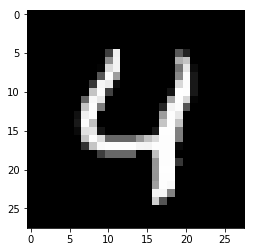

In [3]:
#Showing an example
imageArray = data.iloc[3,1:].values.reshape(28,28)
plt.imshow(imageArray, cmap="Greys_r")
plt.show()

In [9]:
def plot_hist(history):
    #Ploting Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    #Plotting Accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()



#Converting the pixels to the form (28,28,1)
reshaped_data = data.iloc[:,1:].values.reshape(len(data),28,28,1)

#Converting and storing the labels in y
y = keras.utils.to_categorical(data.iloc[:,0].values,num_classes=10)

#Converting to numpy arrays
df_reshaped_data = np.array(reshaped_data)
df_y = np.array(y)

#Splitting data set to train and test
x_train, x_test, y_train, y_test = train_test_split(df_reshaped_data,df_y,test_size=0.2,random_state=None)


In [20]:
#Creating the CNN
model = Sequential()
model.add(Convolution2D(32,4,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(16,2,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 16)          2064      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               14500     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
__________

In [22]:
#Fitting the model
history = model.fit(x_train,y_train,validation_split=0.2, epochs=15)



Train on 6399 samples, validate on 1600 samples
Epoch 1/15
6399/6399 [==============================] - 3s 395us/step - loss: 1.5615 - acc: 0.8790 - val_loss: 0.8553 - val_acc: 0.9350
Epoch 2/15
6399/6399 [==============================] - 2s 386us/step - loss: 1.4147 - acc: 0.8909 - val_loss: 0.9140 - val_acc: 0.9325
Epoch 3/15
6399/6399 [==============================] - 2s 386us/step - loss: 1.4273 - acc: 0.8911 - val_loss: 0.8844 - val_acc: 0.9369
Epoch 4/15
6399/6399 [==============================] - 2s 384us/step - loss: 1.2741 - acc: 0.9037 - val_loss: 0.7600 - val_acc: 0.9450
Epoch 5/15
6399/6399 [==============================] - 2s 385us/step - loss: 1.1927 - acc: 0.9108 - val_loss: 0.8004 - val_acc: 0.9419
Epoch 6/15
6399/6399 [==============================] - 2s 383us/step - loss: 1.2745 - acc: 0.9055 - val_loss: 0.8707 - val_acc: 0.9337
Epoch 7/15
6399/6399 [==============================] - 2s 385us/step - loss: 1.1020 - acc: 0.9178 - val_loss: 0.7282 - val_acc: 0.9475


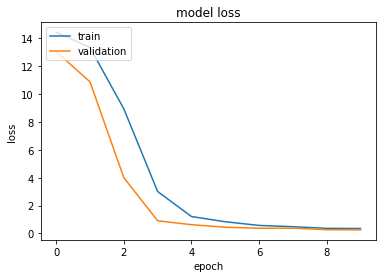

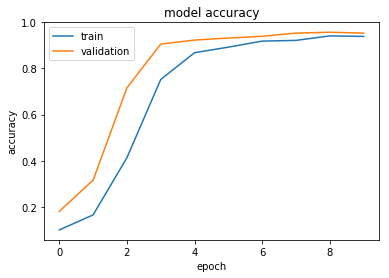

In [7]:
#Ploting History
plot_hist(history)


In [9]:
#Testing 
model.evaluate(x_test,y_test)


2000/2000 [==============================] - 0s 156us/step


[0.3631790563139366, 0.946]

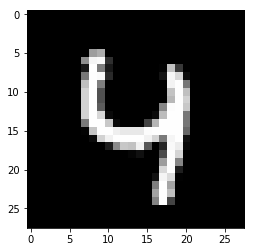

prediction: 4
label: 4


In [12]:
##### Trying a specific example (4)
num_ex = 120
pic = x_test[num_ex,:,:].flatten().reshape(28,28)
plt.imshow(pic, cmap="Greys_r")
plt.show()

prediction = model.predict(np.array([x_test[num_ex]]))

print'prediction: {!r}'.format(np.argmax(prediction))
print'label: {!r}'.format(np.argmax(y_test[num_ex]))



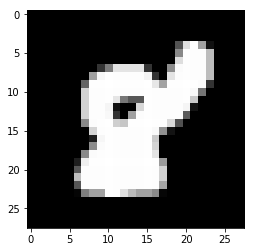

prediction: 8
label: 8


In [15]:
##### Trying a specific example (1)
num_ex = 123
pic = x_test[num_ex,:,:].flatten().reshape(28,28)
plt.imshow(pic, cmap="Greys_r")
plt.show()

prediction = model.predict(np.array([x_test[num_ex]]))

print'prediction: {!r}'.format(np.argmax(prediction))
print'label: {!r}'.format(np.argmax(y_test[num_ex]))




In [20]:
from keras.optimizers import SGD

model = Sequential()

model.add(Convolution2D(32,3 ,data_format='channels_last', activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [21]:
history = model.fit(x_train, y_train,validation_split=0.2, epochs=10)

model.evaluate(x_test,y_test)

Train on 6399 samples, validate on 1600 samples
Epoch 1/10
6399/6399 [==============================] - 14s 2ms/step - loss: 12.7934 - acc: 0.1647 - val_loss: 1.6045 - val_acc: 0.5737
Epoch 2/10
6399/6399 [==============================] - 13s 2ms/step - loss: 0.6981 - acc: 0.7693 - val_loss: 0.1707 - val_acc: 0.9469
Epoch 3/10
6399/6399 [==============================] - 14s 2ms/step - loss: 0.2610 - acc: 0.9206 - val_loss: 0.1069 - val_acc: 0.9663
Epoch 4/10
6399/6399 [==============================] - 14s 2ms/step - loss: 0.1843 - acc: 0.9423 - val_loss: 0.0873 - val_acc: 0.9756
Epoch 5/10
6399/6399 [==============================] - 13s 2ms/step - loss: 0.1342 - acc: 0.9572 - val_loss: 0.1055 - val_acc: 0.9656
Epoch 6/10
6399/6399 [==============================] - 13s 2ms/step - loss: 0.1093 - acc: 0.9681 - val_loss: 0.0664 - val_acc: 0.9781
Epoch 7/10
6399/6399 [==============================] - 13s 2ms/step - loss: 0.0965 - acc: 0.9680 - val_loss: 0.0605 - val_acc: 0.9812
Epoch 

[0.03978097555693239, 0.984]

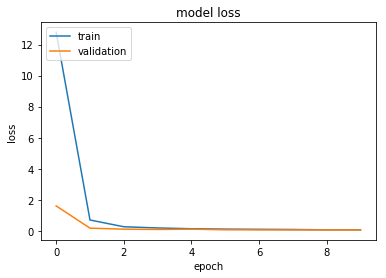

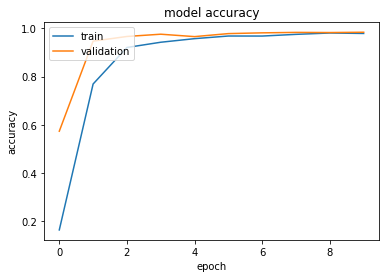

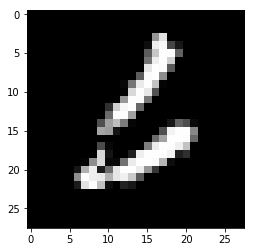

prediction: 1
label: 6


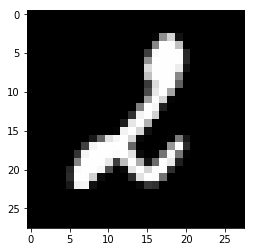

prediction: 1
label: 2


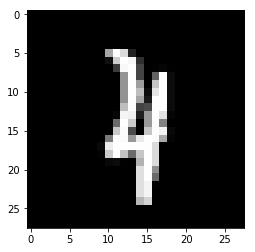

prediction: 1
label: 4


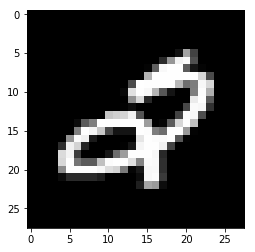

prediction: 8
label: 2


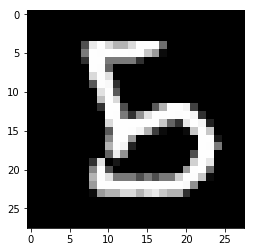

prediction: 6
label: 5


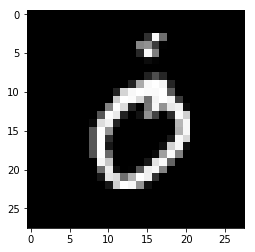

prediction: 6
label: 0


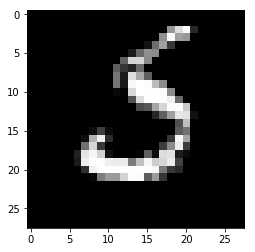

prediction: 0
label: 5


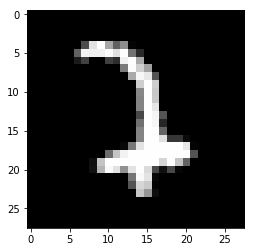

prediction: 1
label: 7


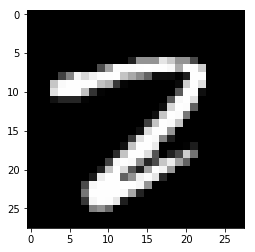

prediction: 7
label: 2


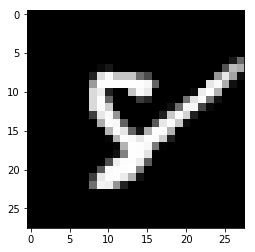

prediction: 9
label: 8


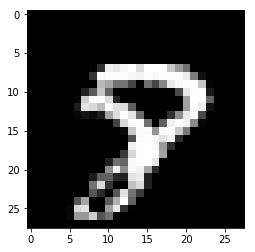

prediction: 9
label: 8


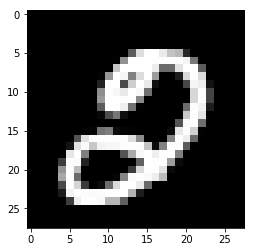

prediction: 0
label: 2


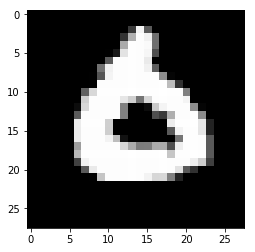

prediction: 0
label: 6


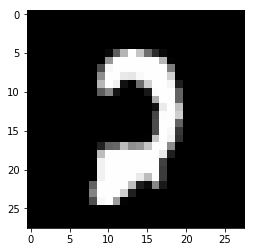

prediction: 7
label: 2


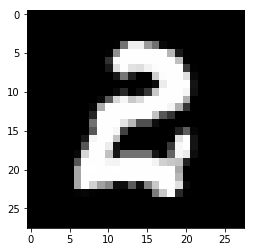

prediction: 3
label: 2


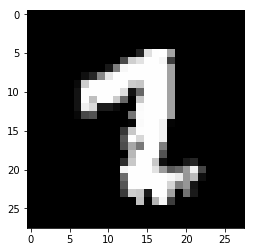

prediction: 1
label: 2


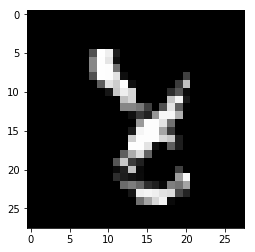

prediction: 2
label: 8


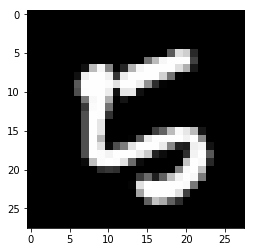

prediction: 6
label: 5


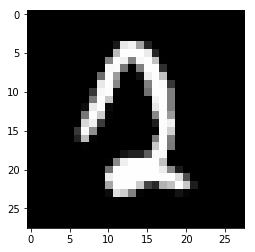

prediction: 0
label: 2


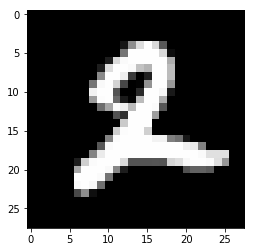

prediction: 8
label: 2


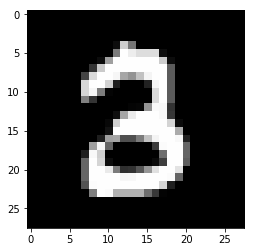

prediction: 8
label: 3


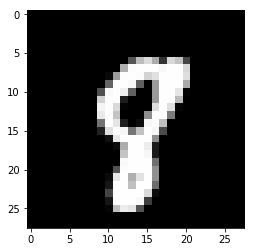

prediction: 9
label: 8


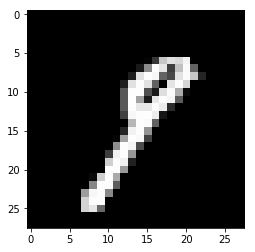

prediction: 1
label: 9


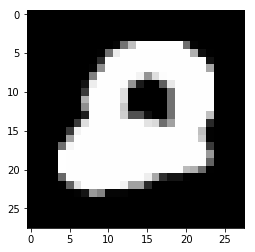

prediction: 8
label: 2


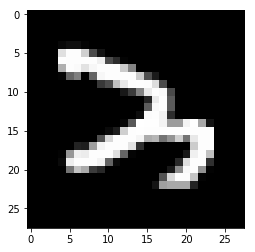

prediction: 2
label: 3


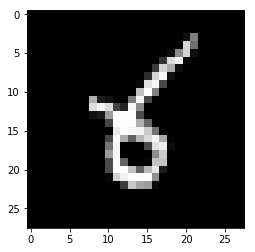

prediction: 8
label: 6


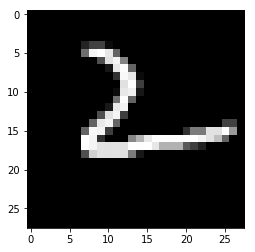

prediction: 4
label: 2


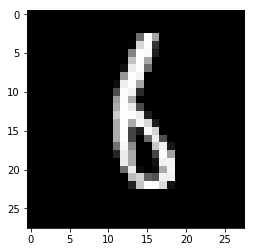

prediction: 8
label: 6


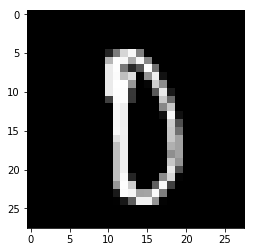

prediction: 8
label: 0


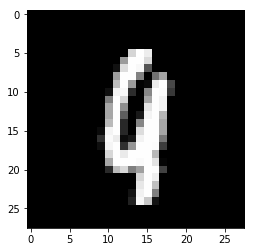

prediction: 4
label: 9


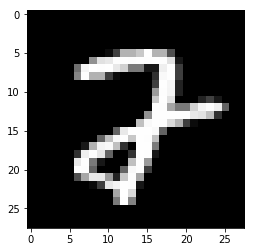

prediction: 8
label: 2


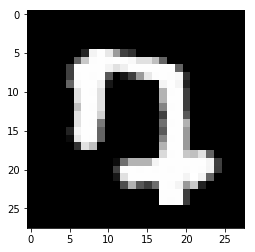

prediction: 0
label: 7


In [22]:
#Ploting History
plot_hist(history)

errors = [];
for num in range(len(x_test)):
    prediction = model.predict(np.array([x_test[num]]))
    if(np.argmax(prediction) != np.argmax(y_test[num])):
        pic = x_test[num,:,:].flatten().reshape(28,28)
        plt.imshow(pic, cmap="Greys_r")
        plt.show()
        print'prediction: {!r}'.format(np.argmax(prediction))
        print'label: {!r}'.format(np.argmax(y_test[num]))
        

